# Data cleaning

In [ ]:
from google.colab import drive
import pandas as pd 
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
#File path to replace in case of testing
file_path = '/content/drive/MyDrive/Assessment3/Productreviews1.csv'
product_reviews = pd.read_csv(file_path)
file_path1 = '/content/drive/MyDrive/Assessment3/trustpilot_reviews.csv'
trust_reviews = pd.read_csv(file_path1)


Mounted at /content/drive


In [ ]:
#Show product reviews data
product = product_reviews.copy()
product.head()


,star,date,title,review
0,1 out of 5 stars,2023-04-13T23:41:49.000Z,This college is a disgrace,The colleges assessment return times are month...
1,1 out of 5 stars,2023-04-12T15:14:46.000Z,Open Colleges is a scam!,"If you value your mental health, don’t waste y..."
2,2 out of 5 stars,2023-04-11T08:31:14.000Z,Half way through and the platform changes… for...,The learning platform was what sold me on this...
3,1 out of 5 stars,2023-04-11T00:35:37.000Z,SCAM!!!,Don't even bother. You are literally paying th...
4,1 out of 5 stars,2023-04-04T05:46:34.000Z,SO TERRIBLE PLEASE DON’T NEVER TAKE CLASSES WI...,We are in at least April 2023 and still in the...


In [ ]:
#Show trust pilot reviews data
trustpilot= trust_reviews.copy()

trustpilot.head()

,rating,date,title,review
0,1,2023-03-29T04:41:01.000Z,I believe this place is a scam,I believe this place is a scam. I canceled the...
1,1,2023-04-03T02:28:06.000Z,BIG SCAM don’t ever enrol with open colleges y...,Since I’m still in the same situation nothing ...
2,1,2023-03-06T07:04:18.000Z,If I could give zero stars for Open…,If I could give zero stars for Open Colleges t...
3,1,2023-03-03T06:16:30.000Z,Zero star!!!!,I have been studying diploma with Open college...
4,1,2023-03-03T00:56:14.000Z,Choosing Open college for study is the…,Choosing Open college for study is the biggest...


In [ ]:
def count_missing_values(df):
    missing_counts = df.isnull().sum()
    print("Number of reviews:", len(df))
    print("Missing value counts:")
    for col, count in missing_counts.iteritems():
        print(f"{col}: {count}")

count_missing_values(trust_reviews) #93 rows don't have any review on it
count_missing_values(product_reviews)



Number of reviews: 3300
Missing value counts:
rating: 0
date: 0
title: 0
review: 93
Number of reviews: 215
Missing value counts:
star: 0
date: 0
title: 0
review: 0


<ipython-input-11-2d2a11a0706c>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, count in missing_counts.iteritems():
<ipython-input-11-2d2a11a0706c>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, count in missing_counts.iteritems():


In [ ]:
trustpilot.dropna(subset=['review'], inplace=True)
count_missing_values(trustpilot)


Number of reviews: 3207
Missing value counts:
rating: 0
date: 0
title: 0
review: 0


<ipython-input-11-2d2a11a0706c>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, count in missing_counts.iteritems():


Clean Data

In [ ]:
import pandas as pd
import re

def clean_star(star):
    if isinstance(star, str):
        return star[0]
    else:
        return str(star)[0]


def clean_date(date):
    return pd.to_datetime(date, dayfirst=True).strftime('%d-%m-%Y')

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\' ]', '', text)
    text = text.strip()
    text = re.sub('\d+', '', text)
    return text

#Clean Product Reviews

product['star'] = product['star'].apply(clean_star).astype('int64')
product['date'] = product['date'].apply(clean_date)
product['title'] = product['title'].apply(clean_text)
product['review'] = product['review'].apply(clean_text)

#Clean Trust Pilot Reviews

trustpilot['review'] = trustpilot['review'].astype(str)
trustpilot['date'] = trustpilot['date'].apply(clean_date)
trustpilot['title'] = trustpilot['title'].apply(clean_text)
trustpilot['review'] = trustpilot['review'].apply(clean_text)
trustpilot.rename(columns={'rating': 'star'}, inplace=True)



Clean Trust Pilot Reviews

In [ ]:
product.head()

,star,date,title,review
0,1,13-04-2023,this college is a disgrace,the colleges assessment return times are month...
1,1,12-04-2023,open colleges is a scam,if you value your mental health dont waste you...
2,2,11-04-2023,half way through and the platform changes for ...,the learning platform was what sold me on this...
3,1,11-04-2023,scam,don't even bother you are literally paying the...
4,1,04-04-2023,so terrible please dont never take classes wit...,we are in at least april and still in the sam...


In [ ]:
trustpilot.head()

,star,date,title,review
0,1,29-03-2023,i believe this place is a scam,i believe this place is a scam i canceled the ...
1,1,03-04-2023,big scam dont ever enrol with open colleges yo...,since im still in the same situation nothing h...
2,1,06-03-2023,if i could give zero stars for open,if i could give zero stars for open colleges t...
3,1,03-03-2023,zero star,i have been studying diploma with open college...
4,1,03-03-2023,choosing open college for study is the,choosing open college for study is the biggest...


In [ ]:
#Check data types before merge
print(product.dtypes)
print(trustpilot.dtypes)

star       int64
date      object
title     object
review    object
dtype: object
star       int64
date      object
title     object
review    object
dtype: object


In [ ]:
# merge the datasets
merged_reviews = pd.concat([product, trustpilot], ignore_index=True)
print("Total number of reviews collected:", len(merged_reviews))


Total number of reviews collected: 3422


In [ ]:
from google.colab import files
merged_reviews.to_csv('merged_reviews.csv',index=False)
files.download('merged_reviews.csv')

NameError: ignored

In [ ]:
from google.colab import drive
import pandas as pd 
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
#File path to replace in case of testing
file_path = '/content/drive/MyDrive/Assessment3/merged_reviews.csv'
merged_reviews = pd.read_csv(file_path)



Mounted at /content/drive


In [ ]:
merged_reviews.head()

,star,date,title,review
0,1,13-04-2023,this college is a disgrace,the colleges assessment return times are month...
1,1,12-04-2023,open colleges is a scam,if you value your mental health dont waste you...
2,2,11-04-2023,half way through and the platform changes for ...,the learning platform was what sold me on this...
3,1,11-04-2023,scam,don't even bother you are literally paying the...
4,1,04-04-2023,so terrible please dont never take classes wit...,we are in at least april and still in the sam...


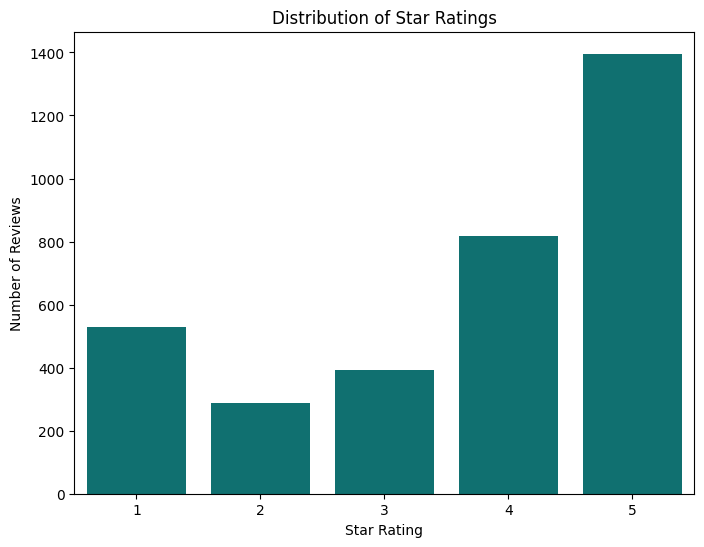

<Figure size 1200x800 with 0 Axes>

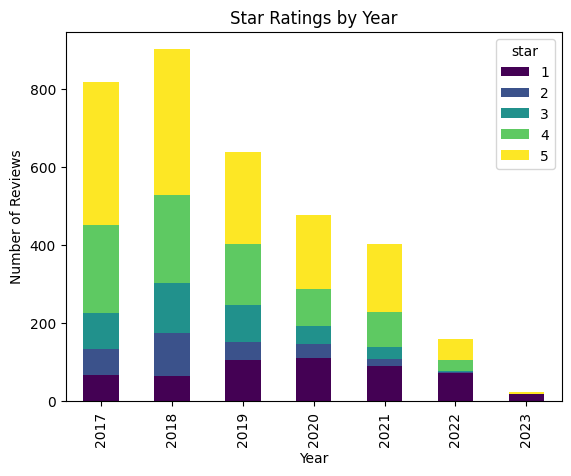

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Count number of reviews by star rating
star_counts = merged_reviews['star'].value_counts().sort_index()

# Create barplot of star rating distribution
plt.figure(figsize=(8,6))
sns.barplot(x=star_counts.index, y=star_counts.values, color='teal')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')
plt.show()

# Count number of reviews by year and star rating
merged_reviews['year'] = pd.DatetimeIndex(merged_reviews['date']).year
star_counts_by_year = merged_reviews.groupby(['year', 'star'])['review'].count().unstack().fillna(0)

# Create stacked barplot of star rating by year
plt.figure(figsize=(12,8))
star_counts_by_year.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Star Ratings by Year')
plt.show()



In [ ]:
merged_reviews_use= merged_reviews
print("Total number of reviews to use:", len(merged_reviews_use))

Total number of reviews to use: 3422


In [ ]:
merged_reviews_use.head()



,star,date,title,review,year
0,1,13-04-2023,this college is a disgrace,the colleges assessment return times are month...,2023
1,1,12-04-2023,open colleges is a scam,if you value your mental health dont waste you...,2023
2,2,11-04-2023,half way through and the platform changes for ...,the learning platform was what sold me on this...,2023
3,1,11-04-2023,scam,don't even bother you are literally paying the...,2023
4,1,04-04-2023,so terrible please dont never take classes wit...,we are in at least april and still in the sam...,2023


Prepare data

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
#!pip install gensim==3.8.3
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

import nltk
from nltk.stem import WordNetLemmatizer 

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
from pyLDAvis import gensim_models
#import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install wordcloud
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Example Tokens:  [['was', 'extremely', 'pleased', 'with', 'the', 'content', 'and', 'delivery', 'for', 'cert', 'iv', 'in', 'business', 'administration', 'and', 'would', 'highly', 'recommend', 'the', 'course', 'to', 'any', 'administrator', 'update', 'your', 'skills', 'and', 'knowledge', 'challenge', 'yourself'], ['easy', 'to', 'read', 'and', 'comprehend', 'lectures', 'and', 'modules', 'method', 'of', 'imparting', 'information', 'makes', 'the', 'subject', 'not', 'so', 'esoteric', 'college', 'may', 'need', 'to', 'read', 'through', 'the', 'modules', 'as', 'there', 'are', 'some', 'spelling', 'and', 'grammatical', 'errors', 'on', 'many', 'sections', 'also', 'the', 'college', 'may', 'need', 'to', 'revisit', 'ueeneeea', 'solve', 'problems', 'in', 'dc', 'circuits', 'project', 'steps', 'and', 'there', 'are', 'some', 'inconsistences', 'that', 'confuse', 'the', 'students', 'the', 'question', 'refers', 'to', 'figure', 'which', 'is', 'in', 'step', 'but', 'erroneously', 'states', 'return', 'the', 'cir

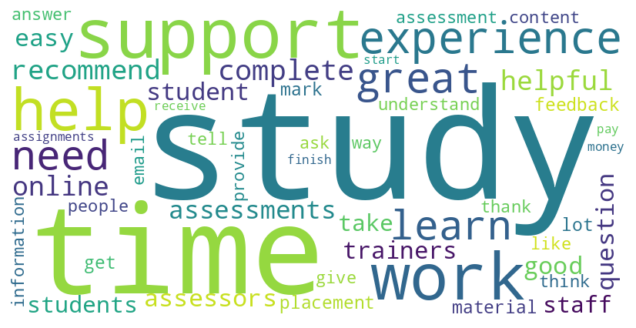

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases, Phraser
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary nltk resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Preprocess the data
data = merged_reviews_use.review.sample(3000, random_state=111).tolist()
data = [str(d) for d in data]  # Convert all values to string

# Create bigrams and trigrams
tokens = [simple_preprocess(review, deacc=True) for review in data]

# Print some example tokens
print("Example Tokens: ", tokens[:3])


bigram_phrases = Phrases(tokens, min_count=5, threshold=100)
trigram_phrases = Phrases(bigram_phrases[tokens], min_count=5, threshold=100)

bigram = Phraser(bigram_phrases)
trigram = Phraser(trigram_phrases)
tokens = trigram[bigram[tokens]]



# Perform lemmatization and extend stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(gensim.parsing.preprocessing.STOPWORDS)
stop_words.update(['open', 'college', 'colleges', 'course', 'courses', 'edu', 'certificate', 'cert', 'diploma', 'iii','s'])
tokens = [[lemmatizer.lemmatize(token, pos='v') for token in doc if token not in stop_words] for doc in tokens]

# Create a dictionary and a corpus
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(doc) for doc in tokens]

print(dictionary)

# Get a list of all the words in the tokens list
all_words = [word for sublist in tokens for word in sublist]

# Count the frequency of each word
word_freq = {}
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a WordCloud from the word frequency dictionary
wc = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()




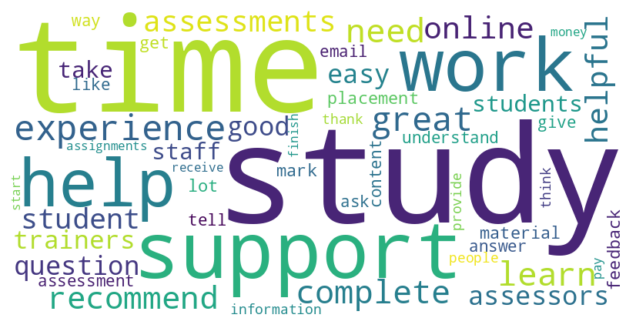

In [ ]:
# Get a list of all the words in the tokens list
all_words = [word for sublist in tokens for word in sublist]

# Count the frequency of each word
word_freq = {}
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a WordCloud from the word frequency dictionary
wc = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

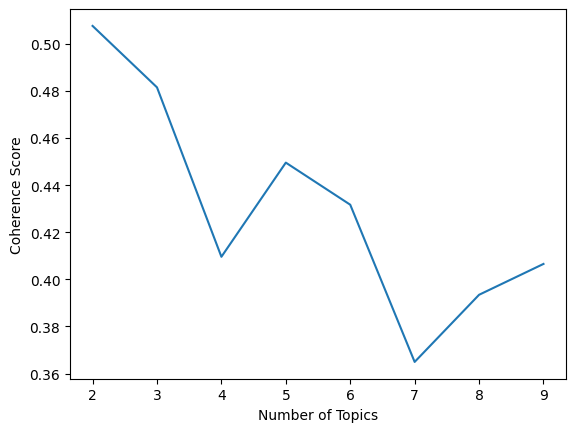

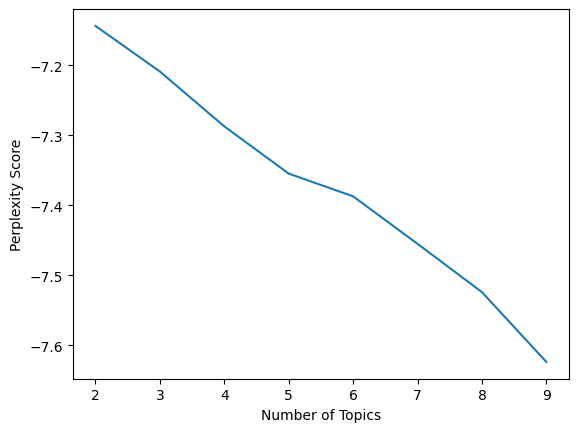

In [ ]:
# Find the best number of topics
coherence_scores = []
perplexity_scores = []
for num_topics in range(2, 10):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=99,
                         chunksize=100,
                         passes=20,
                         alpha='auto',
                         eta='auto',
                         per_word_topics=True)
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append((num_topics, coherence_lda))
    perplexity_scores.append((num_topics, lda_model.log_perplexity(corpus)))

# Visualize the coherence scores
x, y = zip(*coherence_scores)
plt.plot(x, y)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

x, y = zip(*perplexity_scores)
plt.plot(x, y)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.show()


In [ ]:
from tabulate import tabulate


table = [["Number of Topics", "Coherence Score", "Perplexity Score"]]
for i in range(len(coherence_scores)):
    table.append([coherence_scores[i][0], coherence_scores[i][1], perplexity_scores[i][1]])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



╒════════════════════╤═══════════════════╤════════════════════╕
│   Number of Topics │   Coherence Score │   Perplexity Score │
╞════════════════════╪═══════════════════╪════════════════════╡
│                  2 │          0.507641 │           -7.14346 │
├────────────────────┼───────────────────┼────────────────────┤
│                  3 │          0.481546 │           -7.20857 │
├────────────────────┼───────────────────┼────────────────────┤
│                  4 │          0.409585 │           -7.28695 │
├────────────────────┼───────────────────┼────────────────────┤
│                  5 │          0.449579 │           -7.35442 │
├────────────────────┼───────────────────┼────────────────────┤
│                  6 │          0.431702 │           -7.38696 │
├────────────────────┼───────────────────┼────────────────────┤
│                  7 │          0.364934 │           -7.45479 │
├────────────────────┼───────────────────┼────────────────────┤
│                  8 │          0.393448

In [ ]:
# Train the final LDA model using the best number of topics

lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5,
                     random_state=99,
                     chunksize=100,
                     passes=20,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)

# Visualise the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
# Create a DataFrame with the words per topic
topics_df = pd.DataFrame(columns=['Topic', 'Words'])
for topic in lda_model.show_topics(num_topics=5, num_words=15, formatted=False):
    topic_num = topic[0] +1
    topic_words = [word[0] for word in topic[1]]
    topics_df = topics_df.append({'Topic': topic_num, 'Words': topic_words}, ignore_index=True)

# Display the DataFrame
topics_df


,Topic,Words
0,1,"[pay, money, tell, enrol, send, dont, say, wan..."
1,2,"[materials, write, assistance, date, link, tut..."
2,3,"[work, complete, assessments, placement, get, ..."
3,4,"[study, support, help, experience, learn, grea..."
4,5,"[time, question, answer, mark, wait, email, as..."


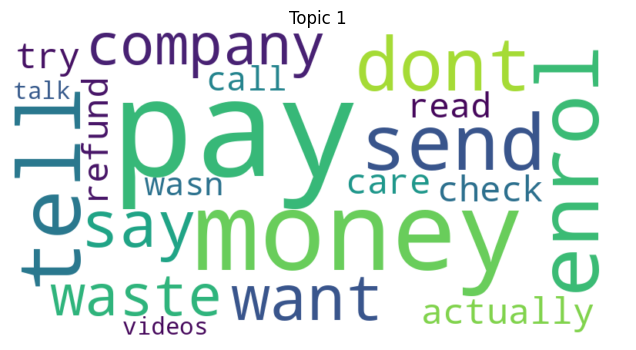

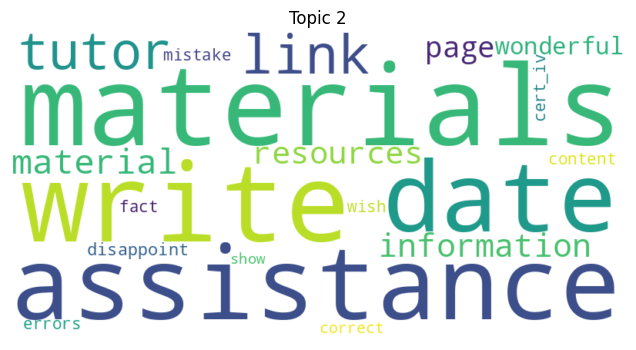

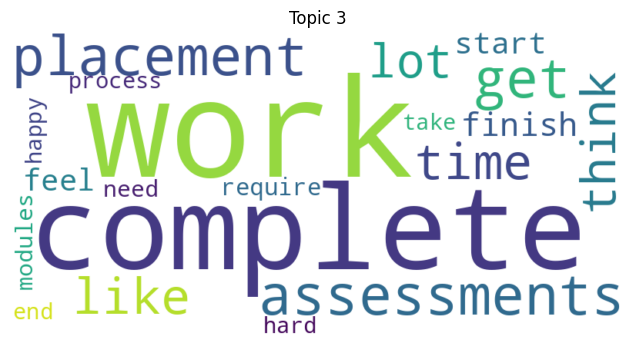

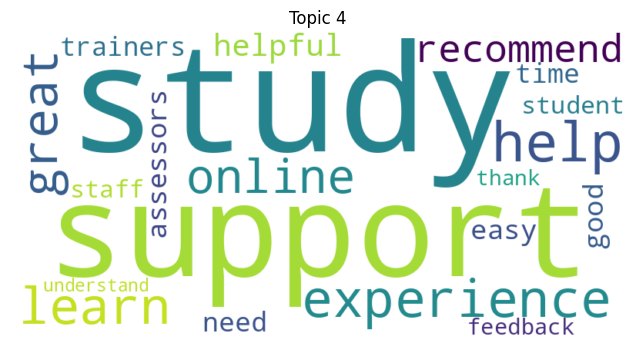

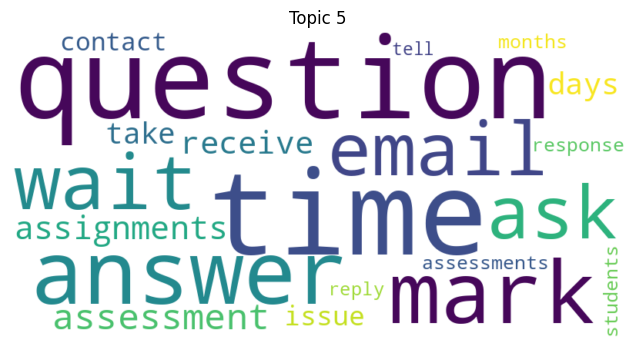

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud for each topic
for i in range(0,5):
    wc = WordCloud(width=800, height=400, background_color='white', max_words=20).generate_from_frequencies(dict(lda_model.show_topic(i, 20)))
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    z=i+1
    plt.title('Topic {}'.format(z))
    plt.show()


In [ ]:
# Print the Keywords in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"pay" + 0.022*"money" + 0.013*"tell" + 0.012*"enrol" + 0.010*"send" + '
  '0.009*"dont" + 0.009*"say" + 0.009*"want" + 0.008*"company" + '
  '0.008*"waste"'),
 (1,
  '0.019*"materials" + 0.018*"write" + 0.018*"assistance" + 0.016*"date" + '
  '0.014*"link" + 0.013*"tutor" + 0.012*"material" + 0.012*"information" + '
  '0.011*"resources" + 0.009*"page"'),
 (2,
  '0.052*"work" + 0.036*"complete" + 0.019*"assessments" + 0.018*"placement" + '
  '0.018*"get" + 0.015*"time" + 0.015*"like" + 0.014*"think" + 0.013*"lot" + '
  '0.013*"finish"'),
 (3,
  '0.048*"study" + 0.045*"support" + 0.030*"help" + 0.029*"experience" + '
  '0.028*"learn" + 0.026*"great" + 0.024*"online" + 0.023*"recommend" + '
  '0.023*"helpful" + 0.018*"assessors"'),
 (4,
  '0.032*"time" + 0.031*"question" + 0.023*"answer" + 0.021*"mark" + '
  '0.017*"wait" + 0.016*"email" + 0.016*"ask" + 0.016*"assessment" + '
  '0.015*"assignments" + 0.015*"receive"')]
